In [ ]:
# Eliana mask code
# plot the masks
import SimpleITK as sitk
import numpy as np
import scipy.ndimage.morphology as scm
import matplotlib.pyplot as plt

root1 = "E:\\prostateMR_radiomics\\nifti\\SABR_new\\829\\MR1\\Masks\\829_MR1_Limbus.nii"
root2 = "E:\\prostateMR_radiomics\\nifti\\SABR_new\\829\\MR1\\Masks\\829_MR1_Prostate_RP.nii"

fullroi1 = sitk.GetArrayFromImage(sitk.ReadImage(root1))
fullroi2 = sitk.GetArrayFromImage(sitk.ReadImage(root2))


print(fullroi1.shape)
print(fullroi2.shape)

# get where mask is 1
indx1 = np.where(fullroi1 == 1)
indx2 = np.where(fullroi2 == 1)
print(indx1[0].shape)
print(indx2[0].shape)

pl_mask1 = fullroi1[fullroi1.shape[0]//2,:,:]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(fullroi1[fullroi1.shape[0]//2,:,:])
plt.subplot(1,2,2)
plt.imshow(fullroi2[fullroi2.shape[0]//2,:,:])
plt.show()

import numpy as np
import scipy.ndimage.morphology as scm



# not sure will need this, can specify from imaging parameters
pixelsz = np.sqrt(distSteps[0]**2 + distSteps[1]**2 + distSteps[2]**2)/2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_data = pd.read_csv("C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\Data\\Longitudinal_All_fts_BaselineRS.csv")

In [5]:
df_vol = df_data.loc[df_data["Feature"] == "original_shape_MeshVolume"]

,Unnamed: 0,PatID,Scan,Days,Fraction,Mask,Feature,FeatureValue,FeatureChange
9200,9200,653,MR6,0,1,RP,original_shape_MeshVolume,0.353178,0.288891
9201,9201,653,MR15,4,2,RP,original_shape_MeshVolume,0.591218,0.703892
9202,9202,653,MR17,7,3,RP,original_shape_MeshVolume,0.599019,0.717493
9203,9203,653,MR21,9,4,RP,original_shape_MeshVolume,0.290566,0.179733
9204,9204,653,MR23,11,5,RP,original_shape_MeshVolume,0.326131,0.241738
...,...,...,...,...,...,...,...,...,...
9287,9287,829,MR15,9,5,RP,original_shape_MeshVolume,0.387364,0.364856
9288,9288,955,MR1,0,1,RP,original_shape_MeshVolume,0.574689,0.288891
9289,9289,955,MR6,3,2,RP,original_shape_MeshVolume,0.738637,0.483695
9290,9290,955,MR16,7,3,RP,original_shape_MeshVolume,0.775727,0.527766


In [2]:
features = df_data["Feature"].unique()
fractions = df_data["Fraction"].unique()

features = np.random.choice(features, 10, replace=False)

In [98]:
# get pats with all fractions
pats = []
for pat in df_data["PatID"].unique():
    if len(df_data.loc[df_data["PatID"] == pat]["Fraction"].unique()) == 5:
        pats.append(pat)
pats_rand = np.random.choice(pats, 3, replace=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


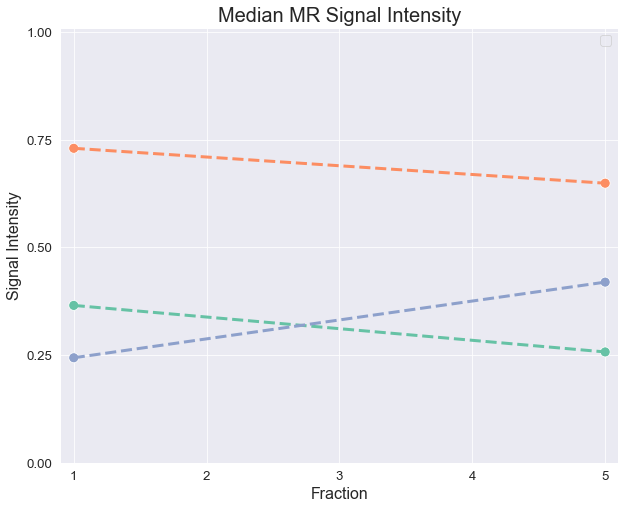

In [116]:
# importance of longitudinal aspect
df_med = df_data.loc[df_data["Feature"] == "original_firstorder_Median"]
df_med = df_med.loc[df_med["PatID"].isin(pats_rand)]


# plot the median for each patient
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set2")
sns.lineplot(x="Fraction", y="FeatureValue", hue="PatID", palette="Set2", data=df_med.loc[df_med["Fraction"].isin([1,5])], linestyle='--', linewidth=3, legend=False)
sns.scatterplot(x="Fraction", y="FeatureValue", hue="PatID", palette="Set2", data=df_med.loc[df_med["Fraction"].isin([1,5])], s=100, legend=False)
#sns.lineplot(x="Fraction", y="FeatureValue", hue="PatID", palette="Set2", data=df_med, legend=False)
#sns.scatterplot(x="Fraction", y="FeatureValue", hue="PatID", palette="Set2", data=df_med, s=100, legend=False)
plt.xlabel("Fraction", fontsize=16)
plt.ylabel("Signal Intensity", fontsize=16)
plt.title("Median MR Signal Intensity", fontsize=20)
plt.ylim(0, 1.01)
plt.xlim(0.9, 5.1)
plt.xticks([1,2,3,4,5])
plt.yticks([0,0.25,0.5,0.75,1])
plt.savefig("C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\Data\\Signal\\Delta.png", dpi=300, bbox_inches="tight")

In [119]:
# ICC for each feature and plot
import pingouin as pg
features = df_data["Feature"].unique()
fractions = df_data["Fraction"].unique()
df_limbus = pd.read_csv("C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\Data\\Longitudinal_Limbus_fts_BaselineRS.csv")

df_ICC = pd.DataFrame(columns=["Feature", "Fraction", "ICC"])

for ft in features:
    df_ft = df_limbus.loc[df_limbus["Feature"] == ft]
    ft = ft.replace("original_", "")
    for fr in fractions:
        df_fr = df_ft.loc[df_ft["Fraction"] == fr]

        icc = pg.intraclass_corr(data=df_fr, targets="PatID", raters="Mask", ratings="FeatureValue")
        df_ICC = df_ICC.append({"Feature": ft, "Fraction": fr, "ICC": icc["ICC"][0]}, ignore_index=True)

df_ICC["ICC_Class"] = df_ICC["ICC"].apply(lambda x: "Poor" if x < 0.5 else ("Moderate" if x < 0.75 else ("Good" if x < 0.9 else "Excellent")))

df_ICC["MeanICC"] = df_ICC.groupby("Feature")["ICC"].transform("mean")
df_ICC["MeanICC_class"] = df_ICC["MeanICC"].apply(lambda x: "Poor" if x < 0.5 else ("Moderate" if x < 0.75 else ("Good" if x < 0.9 else "Excellent")))

df_ICC.head(10)
# get color palette
pal = sns.color_palette("Set2", 2)
pal = pal.as_hex()
pal = pal[0:2]

# plot ICC over time
for ft in df_ICC["Feature"].unique():
    plt.figure(figsize=(10,8))
    sns.set_theme(style="darkgrid")
    sns.set_context("paper", font_scale=1.5)
    sns.set_palette("Set2")
    df_ft = df_ICC.loc[df_ICC["Feature"] == ft]
    
    sns.lineplot(data=df_ft, x="Fraction", y="ICC", linewidth=3, palette="Set2", legend=False, color="black")
    sns.scatterplot(data=df_ft, x="Fraction", y="ICC",s=100, palette="Set2", legend=False, color="black")
    MeanICC = df_ft["MeanICC"].unique()[0]
    colour = pal[1] if MeanICC < 0.5 else pal[0]
    sns.lineplot(data=df_ft, x="Fraction", y="MeanICC", linewidth=3, palette="Set2", legend=False, color = colour)
    plt.xlim(0.9, 5.1)
    plt.ylim(0,1.01)
    plt.xticks([1,2,3,4,5])
    plt.xlabel("Fraction", fontsize=16)
    plt.ylabel("ICC", fontsize=16)
    plt.yticks([0,0.25,0.5,0.75,1])
    plt.title(ft, fontsize=20)
    plt.savefig("C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\Data\ICC\\" + ft + ".png", dpi=300)
    plt.close()


In [151]:
root = "C:/Users/b01297ar/Documents/ProstateMRL-local/ProstateMRL-Radiomics/Data/ICC/"
files = os.listdir(root)
import imageio

files = np.random.choice(files, 15, replace=False)

frames = []
for ft in files:
    if ft != "Subfigs":
        frames.append(imageio.v2.imread(root + ft))

imageio.mimsave("C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\Data\\gifs\\ICC.gif", frames, duration=800)

In [121]:
from scipy import stats
import os

# correlate between volume and other features


# get random subset of features

df_vol = df_data.loc[df_data["Feature"] == "original_shape_MeshVolume"]
df_results = pd.DataFrame(columns=["Feature", "Fraction", "Correlation", "P-value"])

for ft in features:
    df_ft = df_data.loc[df_data["Feature"] == ft]

    for fr in fractions:
        df_fr = df_ft.loc[df_ft["Fraction"] == fr]

        vals_ft = df_fr["FeatureValue"].values
        vals_vol = df_vol.loc[df_vol["Fraction"] == fr]["FeatureValue"].values

        corr, pval = stats.pearsonr(vals_ft, vals_vol)

        df_results = df_results.append({"Feature": ft, "Fraction": fr, "Correlation": corr, "P-value": pval}, ignore_index=True)
        df_plot = pd.DataFrame({"Feature": ft, "Fraction": fr, "FeatureValue": vals_ft, "Volume": vals_vol, "Corr": corr, "Pval": pval} )
        df_plot["Pass"] = df_plot["Corr"].apply(lambda x: "Yes" if abs(x) > 0.6 else "No")
        
        # plot the correlation
        plt.figure(figsize=(10,8))
        sns.set_context("paper", font_scale=1.5)
        sns.set_style("darkgrid")
        sns.set_palette("Set2")
        # fit a line with correlation coefficient with color according to pass or fail
        sns.regplot(y="FeatureValue", x="Volume", data=df_plot, line_kws={'label':"Correlation: {0:.2f}".format(corr)}, ci=None, color="green" if abs(corr) < 0.6 else "red")
        # sns.lmplot(y="FeatureValue", x="Volume", data=df_plot, line_kws={'label':"Correlation: {0:.2f}".format(corr)}, legend=False, ci=None)
        # add text box with corr value and  p-value
        textstr = '\n'.join((     r'Correlation: %.2f' % (corr, ),    r'P-value: %.2f' % (pval, )))
        # add a box around the text
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.8, pad=0.5, linewidth=0.5, edgecolor="black")
        
        plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14, verticalalignment='top', bbox=props)
        #sns.regplot(y="FeatureValue", x="Volume", data=df_plot)        plt.xlabel(ft)

        plt.xlabel("Volume", fontsize=16)
        plt.ylabel("Feature Value", fontsize=16)
        plt.xlim(0,1.01)
        plt.ylim(0,1.01)
        ft_plot = ft.replace("original_", "")
        titstr = '\n'.join((    ft_plot,    r'Fraction ' + str(fr) ))
        plt.title(titstr, fontsize=16)
        plt.xticks(np.arange(0,1.01,0.25))
        plt.yticks(np.arange(0,1.01,0.25))

        root = "C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\Data\\VolCorr\\"
        if os.path.isdir(root + ft) == False:
            os.mkdir(root + ft)
        plt.savefig(root + ft + "\\" + ft + "_Fraction_" + str(fr) + ".png")
        plt.close()



In [154]:
folders = os.listdir(root)
root = "C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\Data\\VolCorr\\"
import imageio

folders = np.random.choice(folders, 15, replace=False)

frames = []
for ft in folders:
    if ft != "gifs":
        files = os.listdir(root + ft)
        for f in files:
            frames.append(imageio.v2.imread(root + ft + "\\" + f))

imageio.mimsave("C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\Data\\gifs\\VolCorr.gif", frames, duration=800)


In [140]:
# pick a random feature and patient
ft_p = np.random.choice(features, 1, replace=False)[0]
pat = np.random.choice(pats, 1, replace=False)[0]
print(ft_p)
print(pat)
print(df_data.loc[(df_data["Feature"] == ft_p) & (df_data["PatID"] == pat)]["Fraction"].values)

original_glszm_SizeZoneNonUniformity
1481
[1 2 3 4 5]


In [141]:
# plot difference between trajectorries over time
df_plot = df_data.loc[df_data["PatID"] == pat]
df_plot = df_plot.loc[df_plot["Feature"] == ft_p]

for ft in df_data["Feature"].unique():
    df_ft = df_data.loc[df_data["Feature"] == ft]
    df_pat = df_ft.loc[df_ft["PatID"] == pat]
    ft = ft.replace("original_", "")
    ft1 = df_pat["FeatureValue"].values
    ft2 = df_plot["FeatureValue"].values
    df_temp_p = pd.DataFrame()
    #df_temp = pd.DataFrame({"Feature1": ft, "FeatureValue": ft1, "Feature2":ft_p ,"FeatureValue2": ft2, "Fraction": df_pat["Fraction"].values})
    df_temp = pd.DataFrame({"Feature": ft_p, "FeatureValue": ft2, "Fraction": df_pat["Fraction"].values})
    df_temp_p = df_temp_p.append(df_temp, ignore_index=True)
    df_temp = pd.DataFrame({"Feature": ft, "FeatureValue": ft1, "Fraction": df_pat["Fraction"].values})
    df_temp_p = df_temp_p.append(df_temp, ignore_index=True)

    # pivot long
    #df_temp = df_temp.melt(id_vars=["Feature1", "Feature2", "Fraction"], value_vars=["FeatureValue", "FeatureValue2"], var_name="Feature", value_name="FeatureValue")
    # drop feature column and rename value column
    # pivot longer
    #df_temp = df_temp.pivot(index=["Feature1", "Feature2", "Fraction", "Feature"], columns="Feature", values="FeatureValue").reset_index()
    df_temp_p["Feature"] = df_temp_p["Feature"].apply(lambda x: x.replace("original_", ""))
    #
    # plot feature over time
    plt.figure(figsize=(10,8))
    sns.set_context("paper", font_scale=1.5)
    sns.set_style("darkgrid")
    sns.set_palette("Set2")
    sns.lineplot(x="Fraction", y="FeatureValue", hue="Feature", data=df_temp_p, ci=None, legend=False, linewidth=3)
    sns.scatterplot(x="Fraction", y="FeatureValue", hue="Feature", data=df_temp_p, ci=None, s=100, linewidth=3)
    df_temp_p = df_temp_p.sort_values(by=["Fraction"])
    v_xvals = df_temp_p["Fraction"].values
    v_yvals = df_temp_p["FeatureValue"].values
    # at each fraction plot vertical line between the two features
    for i in range(0, len(v_xvals), 2):
        plt.plot([v_xvals[i], v_xvals[i]], [v_yvals[i], v_yvals[i+1]], color="black", linewidth=2)
    plt.xlim(0.9,5.1)
    plt.ylim(0,1.01)
    plt.xticks(np.arange(1,5.01,1))
    plt.yticks(np.arange(0,1.01,0.25))
    plt.xlabel("Fraction", fontsize=16)
    plt.ylabel("Feature Value", fontsize=16)
    plt.title("Patient " + str(pat), fontsize=20)
    # make legend in top right corner within plot
    plt.legend(loc='upper right')

    plt.savefig("C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\Data\\FeaturesOverTime\\" + ft  + ".png")
    plt.close()


In [142]:
import os
plots = os.listdir("C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\Data\\FeaturesOverTime\\")
import imageio

plots = np.random.choice(plots, 20, replace=False)
frames = []
for p in plots:
    if p != "AllFeatures.gif":
        frames.append(imageio.v2.imread("C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\Data\\FeaturesOverTime\\" + p))


imageio.mimsave("C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\Data\\gifs\\FeatureDistance.gif", frames, duration=1000)

In [ ]:
# Cluster plots

root = "C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\Data\\FeatureData\\ClusterLabels\\"

files = os.listdir(root)
files = np.random.choice(files, 3, replace=False)

for f in files:
    df_cl = pd.read_csv(root + f)
    df_cl = df_cl[["Fraction", "Feature", "FeatureValue", "Cluster"]]
    df_cl["Feature"] = df_cl["Feature"].apply(lambda x: x.replace("original_", ""))
    patID = f.split("_")[0]

    clusters = df_cl["Cluster"].unique()

    clusters = np.random.choice(clusters, 5, replace=False)
    df_cl = df_cl.loc[df_cl["Cluster"].isin(clusters)] 
    
    # line plot
    for cl in clusters:
        plt.figure(figsize=(10,8))
        df_cl_plot = df_cl.loc[df_cl["Cluster"] == cl]
        sns.set_context("paper", font_scale=1.5)
        sns.set_style("darkgrid")
        sns.set_palette("Set2")
        sns.lineplot(x="Fraction", y="FeatureValue", data=df_cl_plot, hue = "Feature", ci=None, legend=False, linewidth=3)
        sns.scatterplot(x="Fraction", y="FeatureValue", data=df_cl_plot, hue = "Feature", ci=None, s=100, linewidth=3)
        plt.xlim(0.9,5.1)
        plt.ylim(0,1.01)
        plt.xticks(np.arange(1,5.01,1))
        plt.yticks(np.arange(0,1.01,0.25))
        plt.xlabel("Fraction", fontsize=16)
        plt.ylabel("Feature Value", fontsize=16)
        plt.title("Patient " + str(patID) + " Cluster " + str(cl), fontsize=20)
        plt.legend(loc='upper right')



In [8]:
import os

root = "E:/prostateMR_radiomics/nifti/"

ts = os.listdir(root)

for t in ts:
    pats = os.listdir(root + t)

    for pat in pats:
        pat_path = os.path.join(root, t, pat)

        scans = os.listdir(pat_path)

        for scan in scans:
            mask_path = os.path.join(pat_path, scan, "Masks")
            
            masks = os.listdir(mask_path)
            #print(masks)
            limbus = os.path.join(mask_path, pat + "_" + scan + "_Limbus_shrunk.nii")
            limbus_new = os.path.join(mask_path, pat + "_" + scan + "_Limbus_pros.nii")
            if os.path.exists(limbus):
                os.rename(limbus, limbus_new)
            RP = os.path.join(mask_path, pat + "_" + scan + "_shrunk_pros.nii")
            RP_new = os.path.join(mask_path, pat + "_" + scan + "_RP_pros.nii")
            if os.path.exists(RP):
                os.rename(RP, RP_new)
            


In [75]:
import pandas as pd
import os

key_old = pd.read_csv("C:/Users/b01297ar/Documents/ProstateMRL-local/ProstateMRL-Radiomics/Paper1-Release/Input/Default_ExtractionKey.csv")

key_old.PatID.unique()

pat_fix = [752, 1088, 1089, 1118, 1303, 1307, 955, 1483]

key_new = key_old.loc[~key_old["PatID"].isin(pat_fix)]
key_temp_l = key_old.loc[(key_old["MaskName"] == "Limbus") & (key_old["PatID"].isin(pat_fix))]
temp_key = pd.DataFrame()
# loop through pat directory and find MS mask
root = "E:/prostateMR_radiomics/nifti/"

ts = ["SABR_new", "SABR"]

for pat in pat_fix:

    for t in ts:
        t_pats = os.listdir(os.path.join(root, t))
        pat = str(pat)
        if t == "SABR_new":
            pat = pat
        else:
            if len(pat) == 3:
                pat = "0000" + pat
            elif len(pat) == 4:
                pat = "000" + pat
        if pat in t_pats:
            pat_path = os.path.join(root, t, str(pat))

            scans = os.listdir(pat_path)

            for scan in scans:
                mask_path = os.path.join(pat_path, scan, "Masks")
                
                masks = os.listdir(mask_path)
                
                MS = os.path.join(mask_path, str(pat) + "_" + scan + "_MS_pros.nii")
                img = os.path.join(pat_path, scan, "HM-FS", str(pat) + "_" + scan + "_HM-FS.nii")
                if os.path.exists(MS):
                    
                    temp_key = temp_key.append({"PatID": pat, "MaskName": "MS", "Scan": scan, "MaskPath": MS, "ImagePath": img}, ignore_index=True)

temp_key.head()

# add in fraction to temp_key by looping through pats and sorting by scan 
temp_key["Fraction"] = ""
for pat in temp_key["PatID"].unique():
    df_pat = temp_key.loc[temp_key["PatID"] == pat]
    df_pat["Scan"] = df_pat["Scan"].str.replace("MR", "").astype(int)
    df_pat = df_pat.sort_values(by="Scan")
    df_pat["Fraction"] = [1,2,3,4,5]
    temp_key.loc[temp_key["PatID"] == pat] = df_pat

# add MR back to scan
temp_key["Scan"] = "MR" + temp_key["Scan"].astype(str)


temp_key = temp_key.sort_values(by=["PatID", "Fraction"])

# replace E:/ with C:/ for mask path
temp_key["MaskPath"] = temp_key["MaskPath"].str.replace("E:/", "D:/data/")
temp_key["ImagePath"] = temp_key["ImagePath"].str.replace("E:/", "D:/data/")
temp_key["PatID"] = temp_key["PatID"].astype(int)
# add in the other masks
key_new = key_new.append(temp_key, ignore_index=True)
key_new = key_new.append(key_temp_l, ignore_index=True)

key_new = key_new.sort_values(by=["PatID", "Fraction"])

# drop scan col
key_new = key_new.drop(columns=["Scan"])
# remove patID == 1464
key_new = key_new.loc[key_new["PatID"] != 1464]
key_new["MaskType"] = key_new["MaskName"].apply(lambda x: "Auto" if x == "Limbus" else "Manual")
# print out each pat df
# get 
for pat in key_new["PatID"].unique():
    df_pat = key_new.loc[key_new["PatID"] == pat]

    # get pats without 5 fractions of either auto or manual
    df_m = df_pat.loc[df_pat["MaskType"] == "Manual"]
    df_a = df_pat.loc[df_pat["MaskType"] == "Auto"]

    if len(df_m["Fraction"].unique()) != 5:
        print("Manual: " + str(pat))
    
    if len(df_a["Fraction"].unique()) != 5:
        print("Auto: " + str(pat))
    

Auto: 752
Auto: 955
Auto: 1088
Auto: 1089
Auto: 1118
Auto: 1303
Auto: 1307
Auto: 1483


c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [76]:
key_limbus = key_new.loc[key_new["MaskName"] != "Limbus"]
key_limbus = key_limbus.drop(columns=["MaskName"])
key_limbus = key_limbus[["PatID", "Fraction", "ImagePath"]]

# split imagepath by \
# replace / with \
key_limbus["ImagePath"] = key_limbus["ImagePath"].str.replace("/", "\\")
key_limbus["Scan"] = key_limbus["ImagePath"].str.split("\\").str[6]

key_limbus.to_csv("C:/Users/b01297ar/Documents/ProstateMRL-local/LimbusKey.csv", index=False)

In [77]:
key_limbus["ImagePath"] = key_limbus["ImagePath"].str.replace("nifti", "patientData")
key_limbus["ImagePath"] = key_limbus["ImagePath"].str.split("\\").str[0:6].str.join("\\")
key_limbus["ImagePath"] = key_limbus["ImagePath"] + "\\"

In [78]:
# create new column with SABR/SABR_new
key_limbus["TS"] = key_limbus["ImagePath"].str.split("\\").str[4]

# if TS == SABR_new remvove 0 from scan number column





In [4]:
test = [10, 8, 8, 5, 7, 6]
counter = 0
for i in range(1,6):
    print(test[-1], test[-1-i])
    if test[-1] < test[-1-i]:
        print("counter ++ ")
        counter += 1
    else:
        print("counter = counter")
        counter = counter
print(counter)



6 7
counter ++ 
6 5
counter = counter
6 8
counter ++ 
6 8
counter ++ 
6 10
counter ++ 
4


In [80]:


for pat in key_limbus["PatID"].unique():
    df_pat = key_limbus.loc[key_limbus["PatID"] == pat]
    if df_pat["TS"].unique()[0] == "SABR_new":
        # add scan to image path
        df_pat["ImagePath"] = df_pat["ImagePath"] + df_pat["Scan"].astype(str) + "\\"
        df_pat = df_pat[["PatID", "Fraction", "Scan", "ImagePath"]]
        df_pat.to_csv("E:/Aaron/ProstateMRL/Data/LimbusKeys/"+ str(pat) + ".csv", index=False)

c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_man = pd.read_csv("C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\UntrackedCode\\TestData\\HM-Test.csv")

# get random fts
fts = np.random.choice(df_man.Feature.unique(), 2, replace=False)
pat = np.random.choice(df_man.PatID.unique(), 1, replace=False)
df_plot = df_man.loc[df_man["PatID"] == pat[0]]

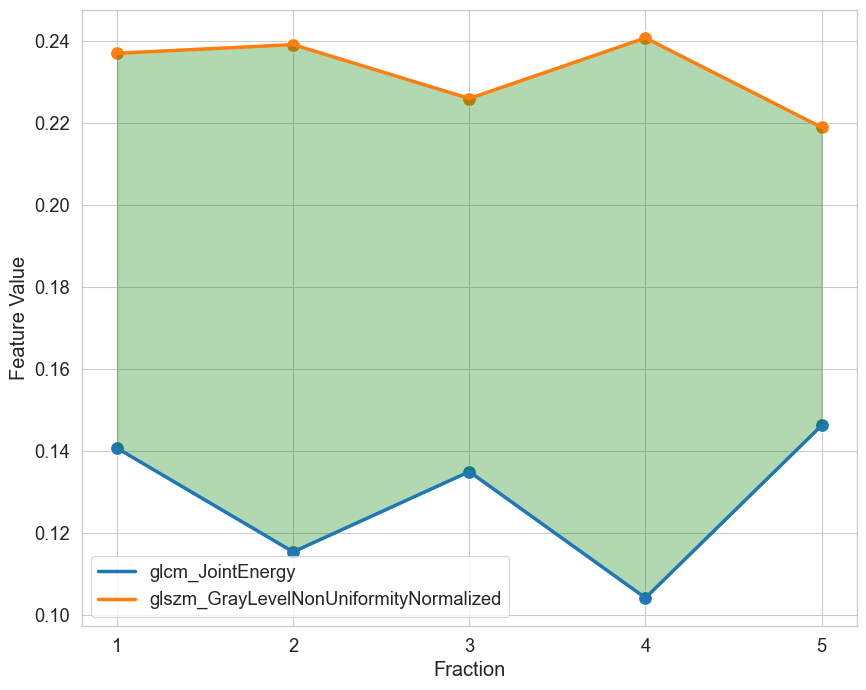

In [13]:
# plot two random feature trajectories from df_man
# for comparing signal trajectories for E.D. and area between trajectories

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))


# plot

sns.lineplot(data = df_plot.loc[df_plot['Feature'] == fts[0]], x = 'Fraction', y='FeatureValue', ax=ax, label=fts[0], linewidth=2.5)
sns.scatterplot(data = df_plot.loc[df_plot['Feature'] == fts[0]], x = 'Fraction', y='FeatureValue', ax=ax, s=100)

sns.lineplot(data = df_plot.loc[df_plot['Feature'] == fts[1]], x = 'Fraction', y='FeatureValue', ax=ax, label=fts[1], linewidth=2.5)
sns.scatterplot(data = df_plot.loc[df_plot['Feature'] == fts[1]], x = 'Fraction', y='FeatureValue', ax=ax, s=100)

ax.set_xlabel('Fraction')
ax.set_ylabel('Feature Value')
ax.set_xticks(np.arange(1, 5.1, 1))

y_vals1 = df_plot.loc[df_plot['Feature'] == fts[0]]['FeatureValue'].values
y_vals2 = df_plot.loc[df_plot['Feature'] == fts[1]]['FeatureValue'].values

# for i in range(1, 6):
#     ax.vlines(i, y_vals1[i-1], y_vals2[i-1], color='black', linestyle='dashed', linewidth=1.5)

# fill in the area between the two lines
ax.fill_between(np.arange(1, 6), y_vals1, y_vals2, color='green', alpha=0.3)


In [33]:
import plotly.express as px
import plotly.graph_objects as go

df_plot = df_man.loc[df_man["PatID"] == pat[0]]
df_plotly = df_plot.loc[df_plot["Feature"].isin(fts)]

# fig = go.Figure()
# add in second line
# fig.add_trace(go.Scatter(df_plotly, x="Fraction", y="FeatureValue", mode="lines", name="Value"))

fig = px.line(df_plotly, x="Fraction", y="FeatureValue", color="Feature", markers=True)
fig.add_trace(go.Scatter(x=df_plotly["Fraction"], y=df_plotly.loc[df_plotly['Feature'] == fts[0]]["FeatureValue"], fill='tonexty'))



fig.show()

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv("C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\UntrackedCode\\TestData\\HM-Test.csv")
df = df[['PatID', 'Fraction', 'Contour', 'Feature', 'FeatureValue']]
fts= df['Feature'].unique()
patIDs = df['PatID'].unique()

In [135]:
df_all = df.copy()

df_all['BaseChange'] = 0
df_all['FracChange'] = 0
df_all['ValueRS'] = 0
df_all['Group'] = df_all['Feature'].str.split('_').str[0]
df_all['Feature'] = df_all['Feature'].str.split('_').str[1]

fts = df_all['Feature'].unique()

for ft in fts:
    for pat in patIDs:
        df_temp = df_all[df_all['PatID'] == pat]
        df_temp = df_temp[df_temp['Feature'] == ft]

        #df_temp['FeatureChange'] = (df_temp['FeatureValue'] - df_temp['FeatureValue'].iloc[0]) / df_temp['FeatureValue'].iloc[0]
        # make Feature change as a percentage of the first value
        df_temp['BaseChange'] = (df_temp['FeatureValue'] - df_temp['FeatureValue'].iloc[0]) / df_temp['FeatureValue'].iloc[0] 
        df_temp['ValueRS'] = (df_temp['FeatureValue'] - df_temp['FeatureValue'].mean()) / df_temp['FeatureValue'].std()
        for i in range(1, len(df_temp)):
            if i == 1:
                df_temp['FracChange'].iloc[i] = 0
            else:
                df_temp['FracChange'].iloc[i] = df_temp['FeatureValue'].iloc[i] - df_temp['FeatureValue'].iloc[i-1] / df_temp['FeatureValue'].iloc[i-1]
        # merge back in to df_fo
        df_all.loc[(df_all['PatID'] == pat) & (df_all['Feature'] == ft), 'BaseChange'] = df_temp['BaseChange']
        df_all.loc[(df_all['PatID'] == pat) & (df_all['Feature'] == ft), 'FracChange'] = df_temp['FracChange']
        df_all.loc[(df_all['PatID'] == pat) & (df_all['Feature'] == ft), 'ValueRS'] = df_temp['ValueRS']

df_all.to_csv('C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\UntrackedCode\\TestData\\df_all.csv')

c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

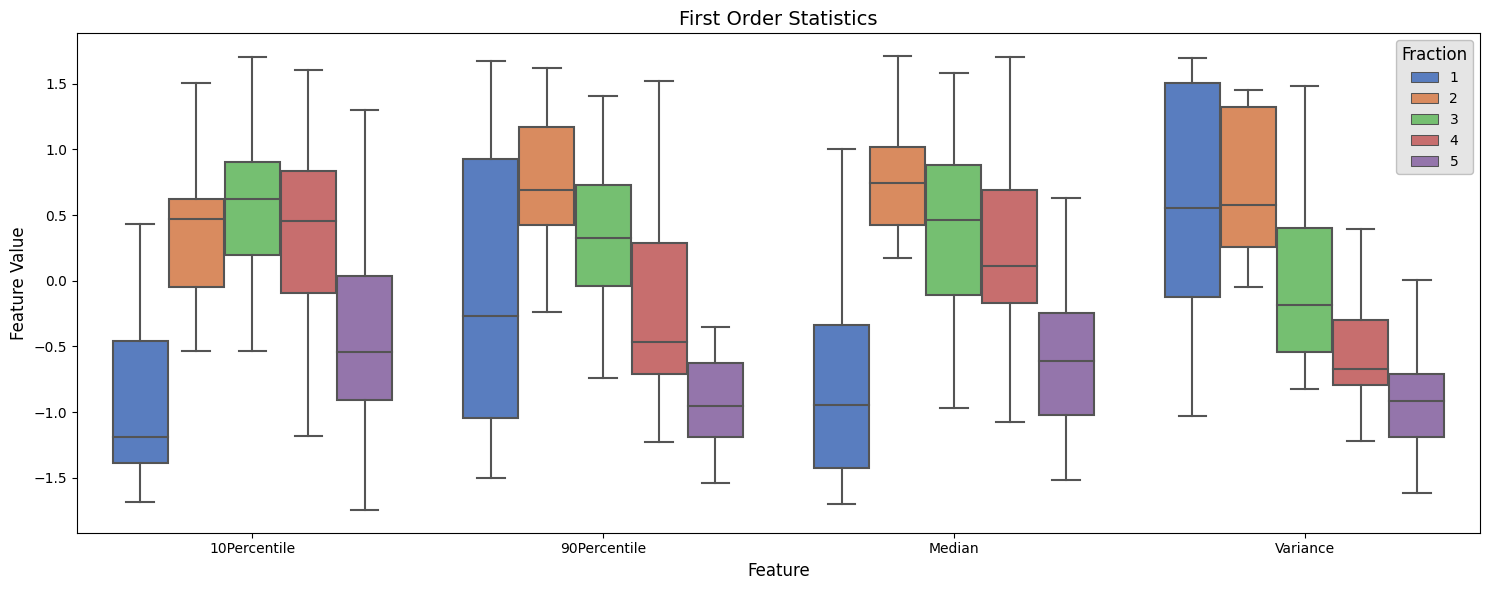

In [134]:
# if fraction is 1 or 5, set colour to red
# if fraction is 2,3  or 4, set colour to blue



for group in df_all['Group'].unique()[0:1]:
    df_grp = df_all[df_all['Group'] == group]
    fts_1 = ['Median', 'Variance', '10Percentile', '90Percentile']
    # df_bar = df_grp[df_grp['Fraction']!=1]
    df_bar = df_all[df_all['Feature'].isin(fts_1)]
    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_subplot(111)
    sns.boxplot(x='Feature', y='ValueRS', hue='Fraction', data=df_bar, ax=ax, palette='muted', showfliers=False)
    ax.set_title("First Order Statistics", fontsize=14)
    ax.set_ylabel('Feature Value', fontsize=12)
    ax.set_xlabel('Feature', fontsize=12)
    # ax.set_ylim(-2, 2)
    ax.legend(loc='upper right', title='Fraction', fontsize=10, title_fontsize=12, fancybox=True, facecolor='grey', framealpha=0.2, edgecolor='black')

    #ax.set_xlim(-2, 2)
    plt.tight_layout()



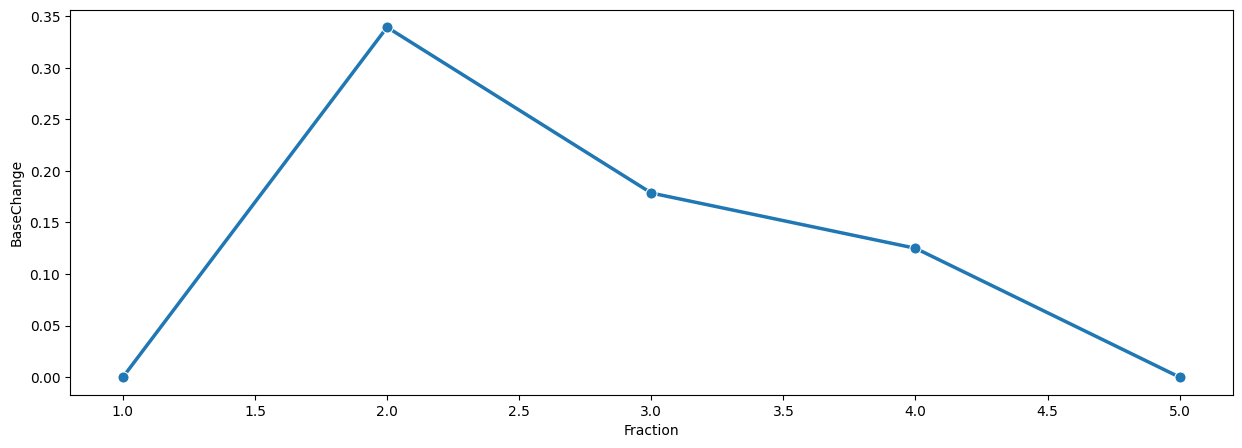

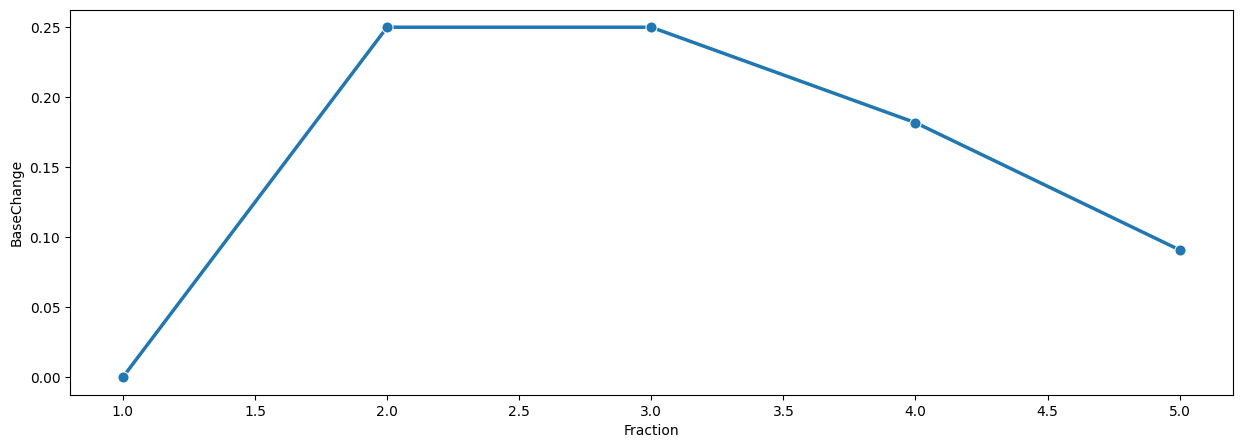

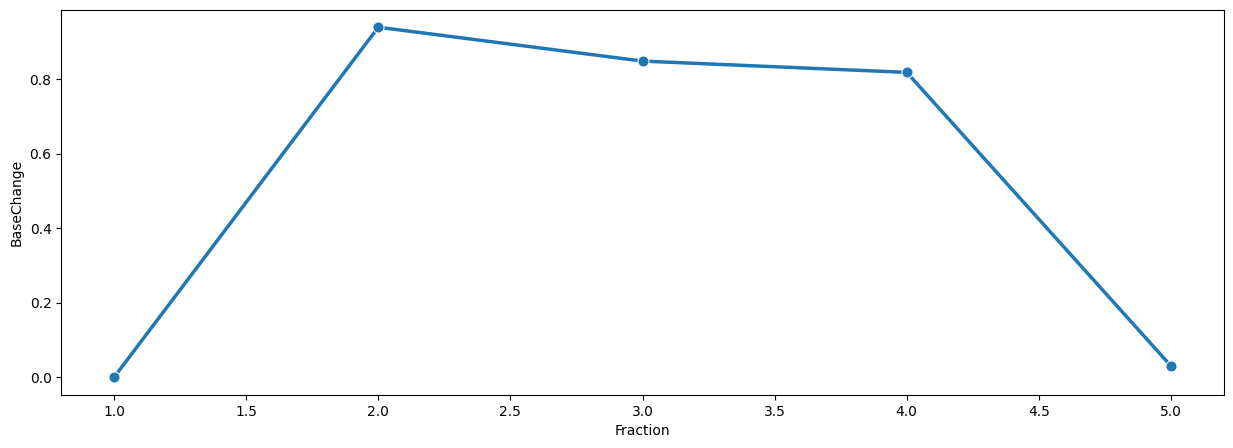

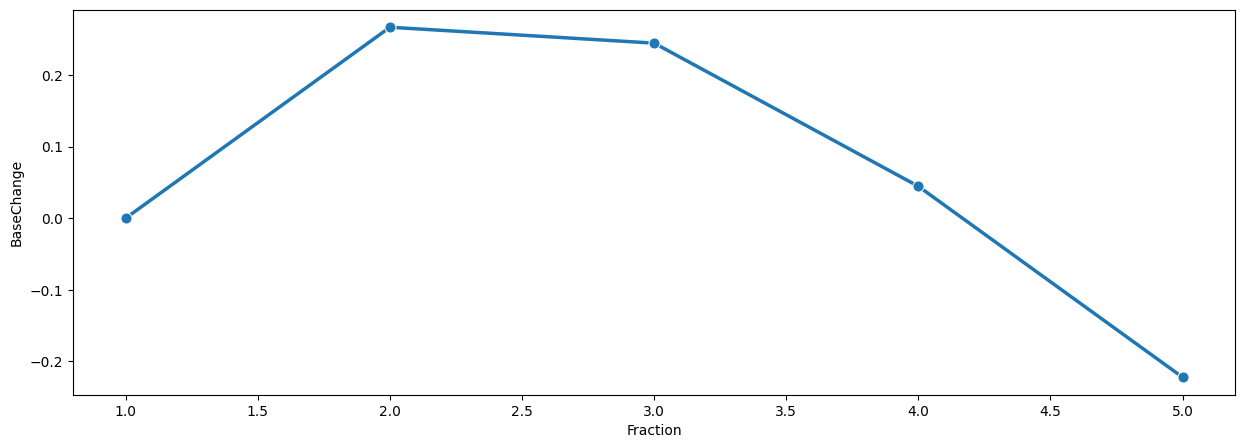

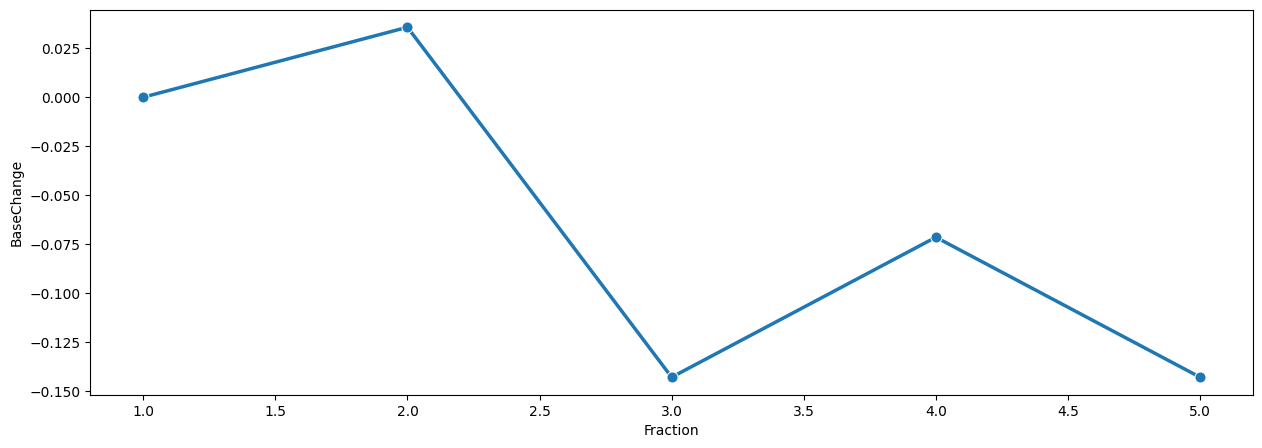

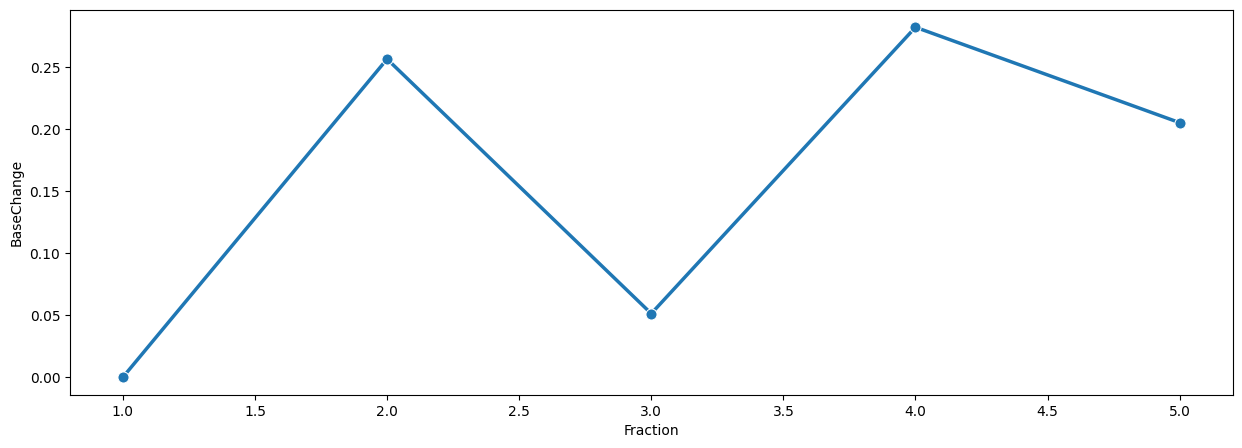

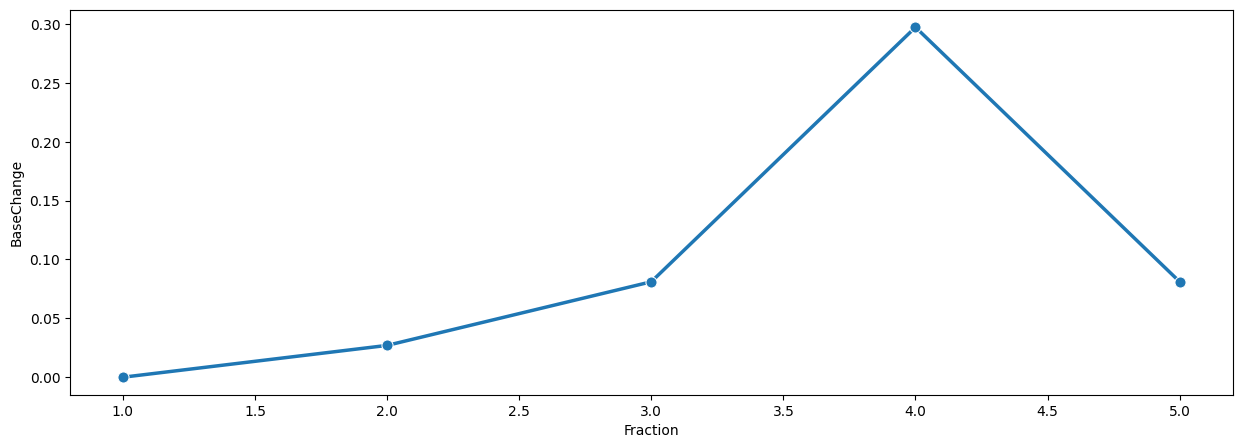

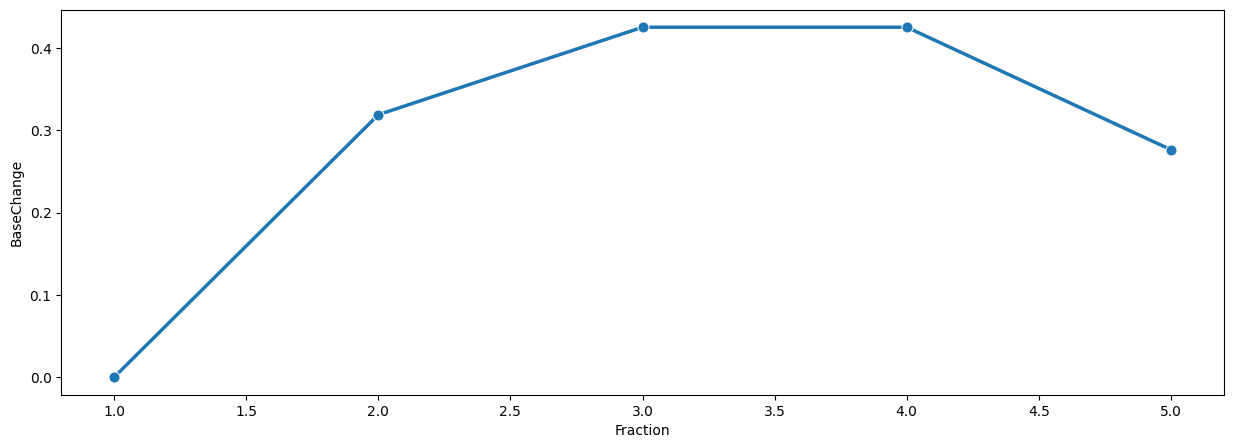

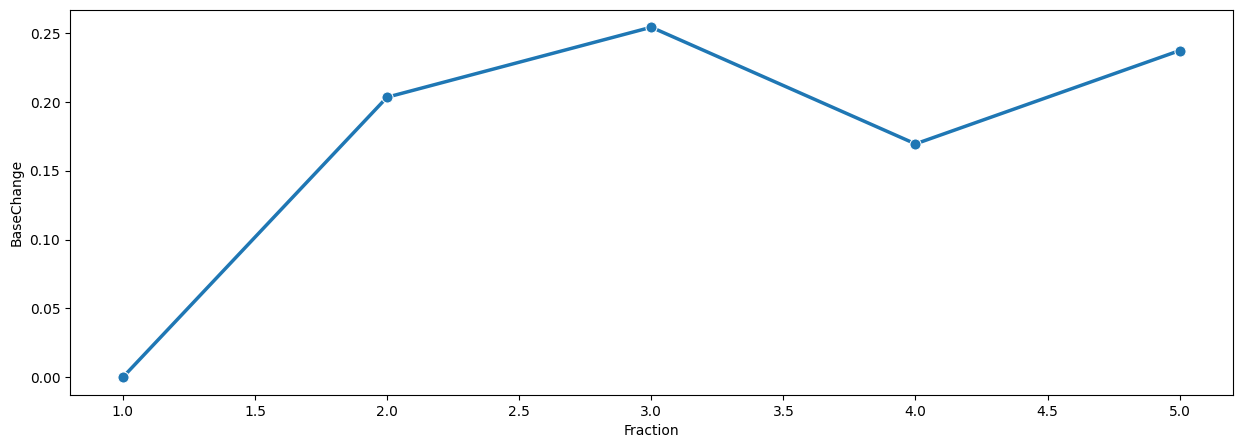

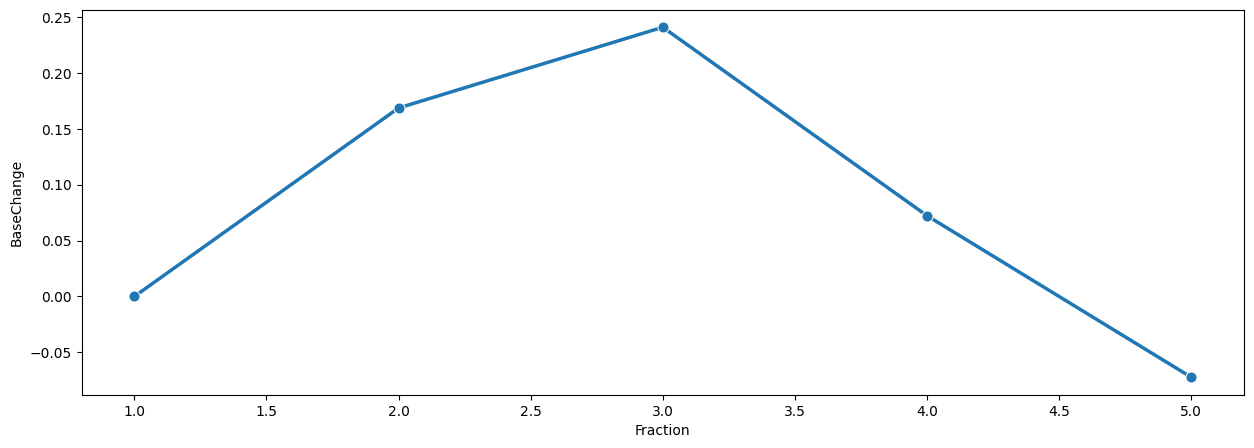

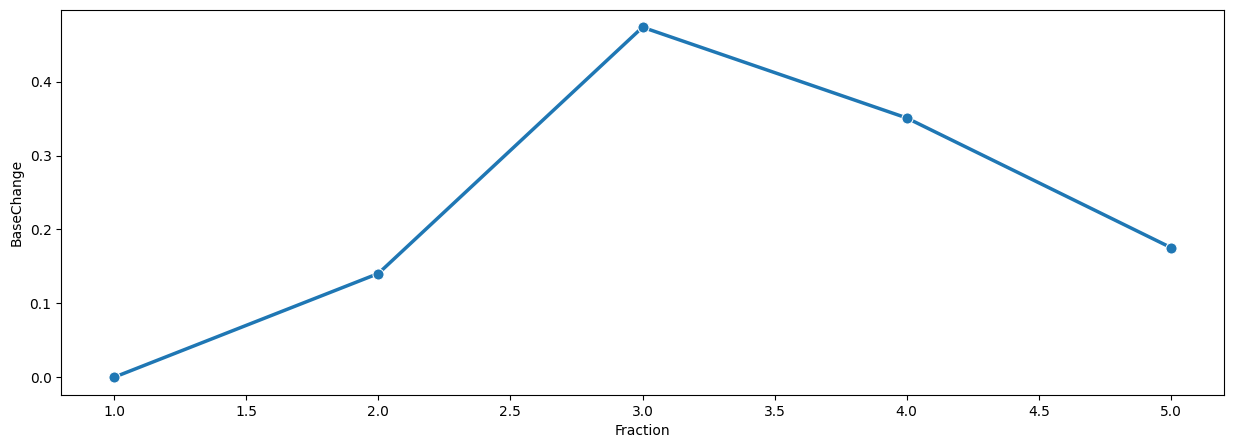

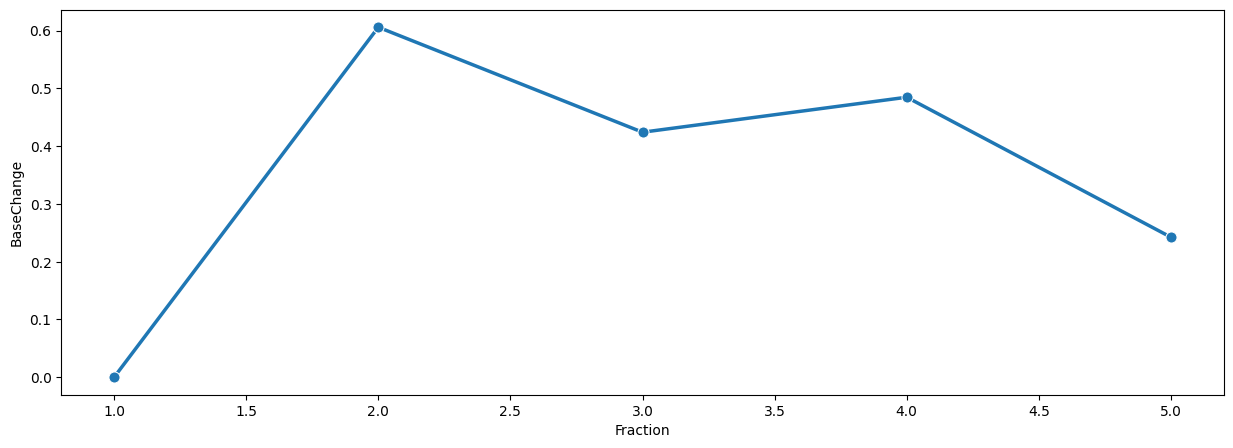

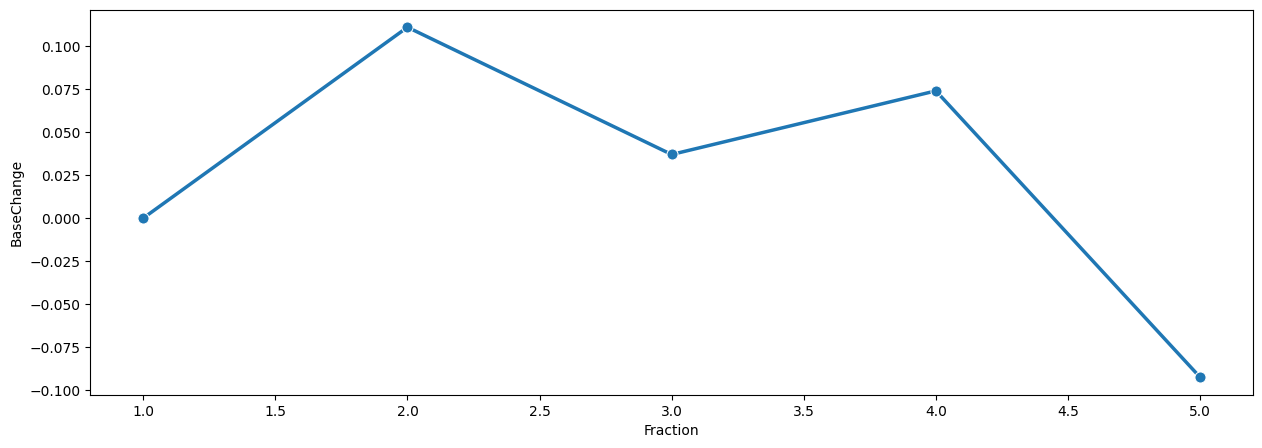

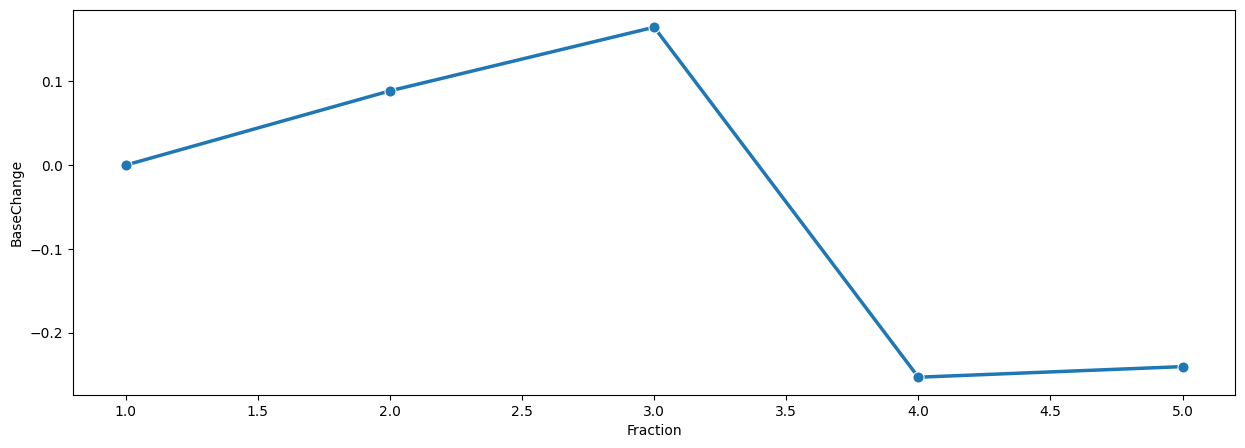

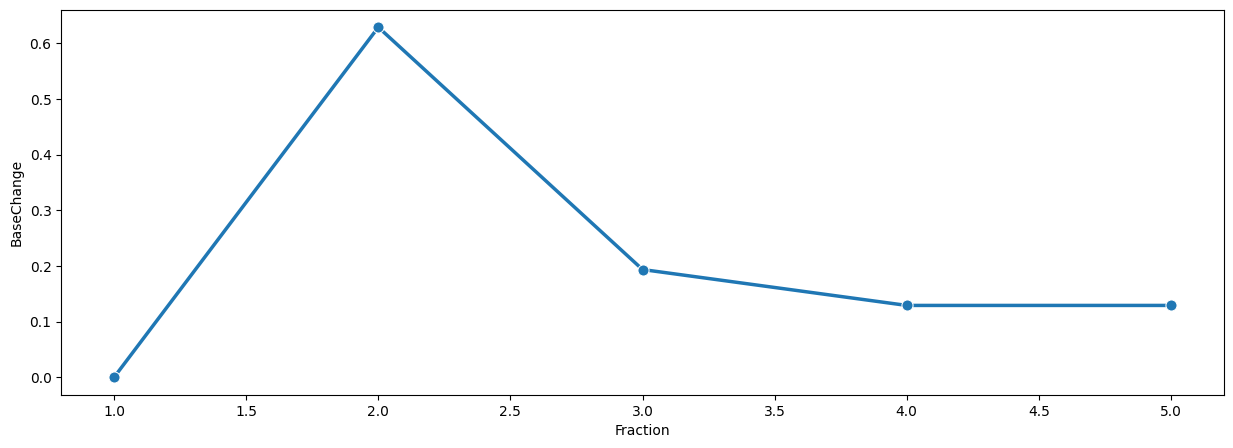

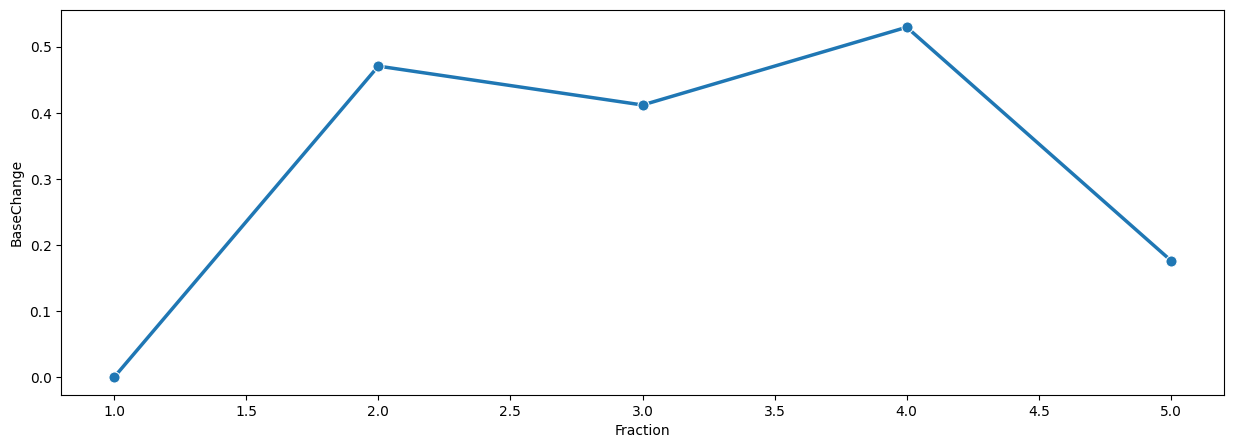

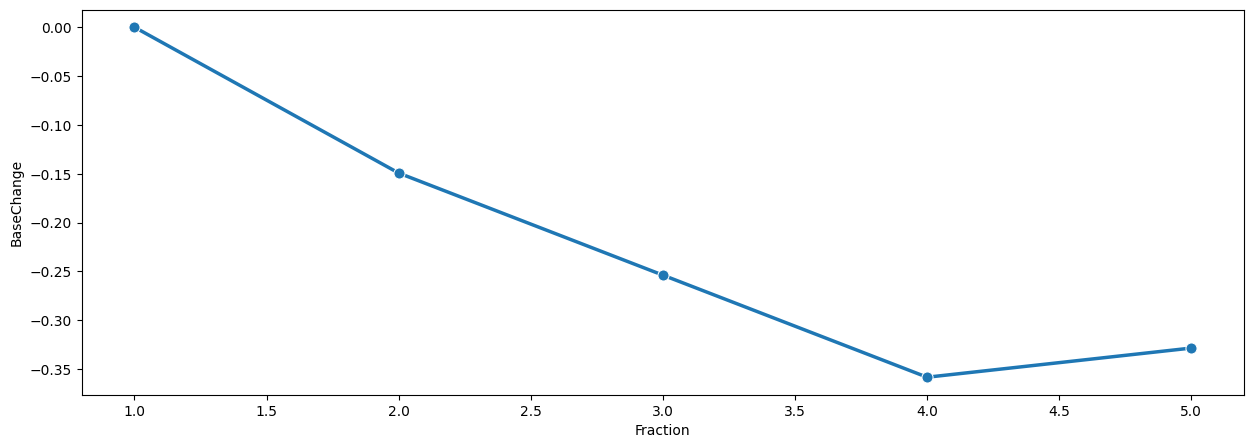

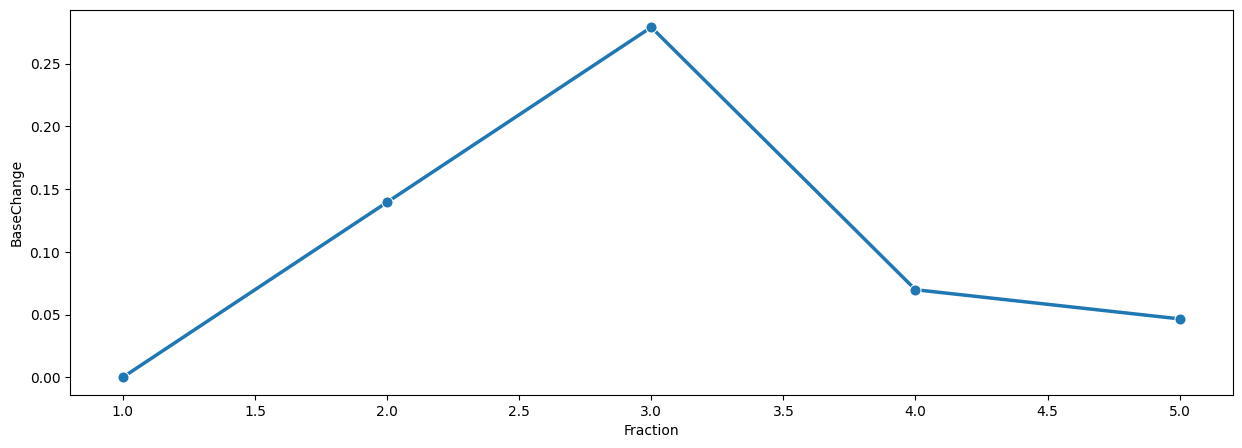

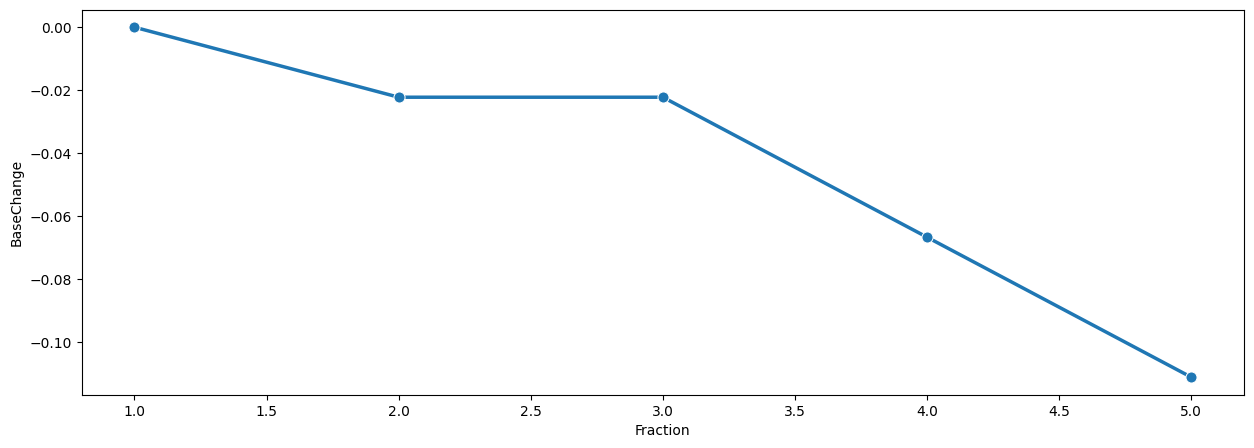

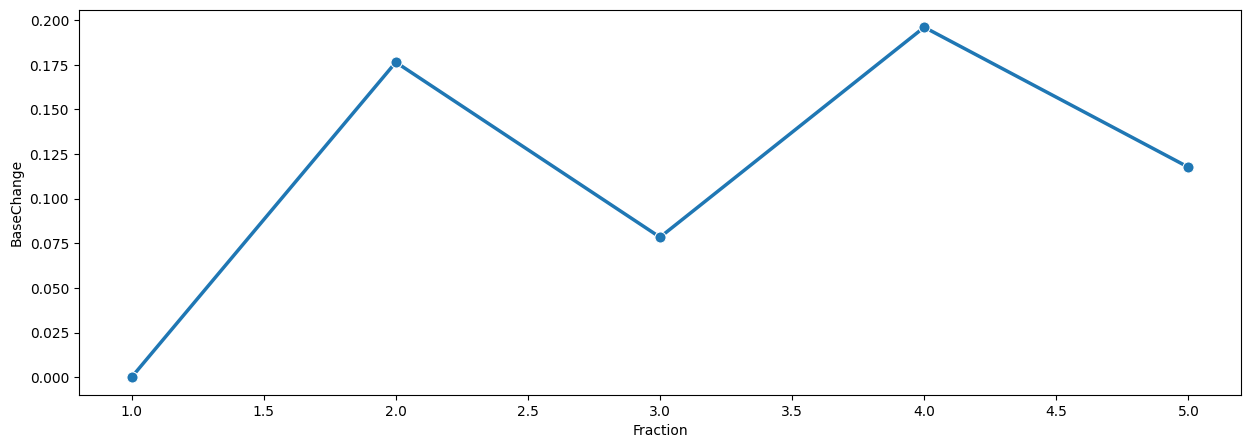

In [151]:
df_signal = df_all.loc[df_all['Feature'] == 'Median']

# Plot
for pat in patIDs:
    fig, ax = plt.subplots(figsize=(15, 5))
    df_pat = df_signal.loc[df_signal['PatID'] == pat]
    sns.lineplot(x='Fraction', y='BaseChange', data=df_pat, ax=ax, marker='o', linewidth=2.5, markersize=8, errorbar=None)

c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  if sys.path[0] == "":


<AxesSubplot:xlabel='Fraction', ylabel='BaseChange'>

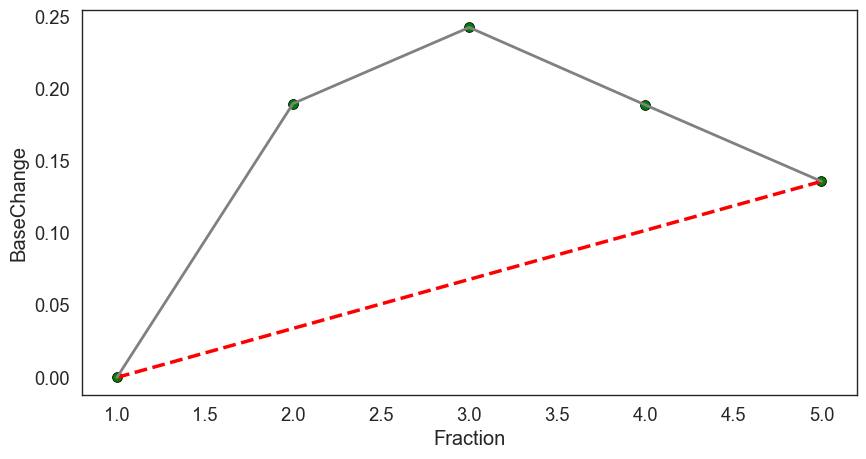

In [187]:
df_barsignal = df_signal.copy()

df_barsignal['BaseChange'] = df_barsignal['BaseChange'].abs()
df_barsignal = df_boxsignal.groupby(['Fraction']).median()
df_barsignal = df_barsignal.reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
# sns.barplot(x='Fraction', y='BaseChange', data=df_barsignal, ax=ax)# change linewidth to 2
sns.set_style("white")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.lineplot(x='Fraction', y='BaseChange', data=df_barsignal.loc[df_barsignal['Fraction'].isin([1,5])], ax=ax, color='red', linestyle='--')
sns.lineplot(x='Fraction', y='BaseChange', data=df_barsignal, ax=ax, color='grey', linewidth=2, ci=None)
sns.scatterplot(x='Fraction', y='BaseChange', data=df_barsignal, ax=ax, color='green', edgecolor='black', s=50)

In [188]:
df_barsignal['BaseChange'] = df_barsignal["BaseChange"] + 1

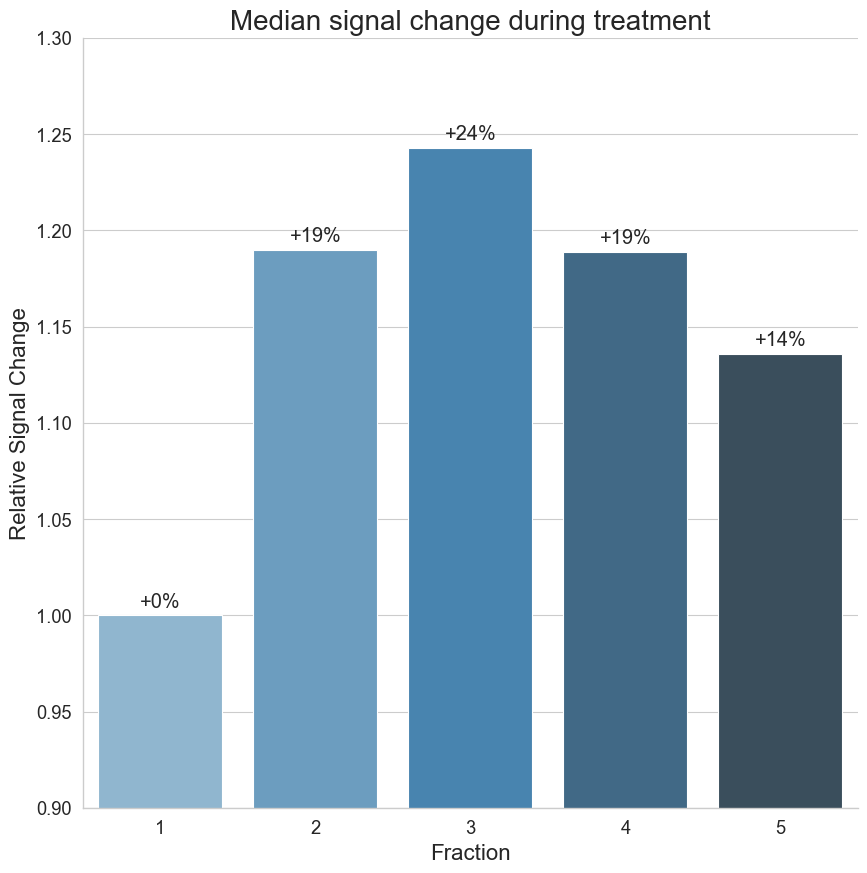

In [224]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('Median signal change during treatment', fontsize=20)
ax.set_xlabel('Fraction', fontsize=16)
ax_set = ax.set(ylim=(0.9, 1.3))

sns.barplot(x='Fraction', y='BaseChange', palette = 'Blues_d', data=df_barsignal, ax=ax)
ax.set_ylabel('Relative Signal Change', fontsize=16)
# add labels to each bar plot in the graph
for p in ax.patches:
    ax.annotate('+' +format((p.get_height() - 1) * 100, '.0f') + '%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
sns.despine()
# ax.set_yticklabels(['{:.0f}'.format(x * 100) for x in ax.get_yticks()])


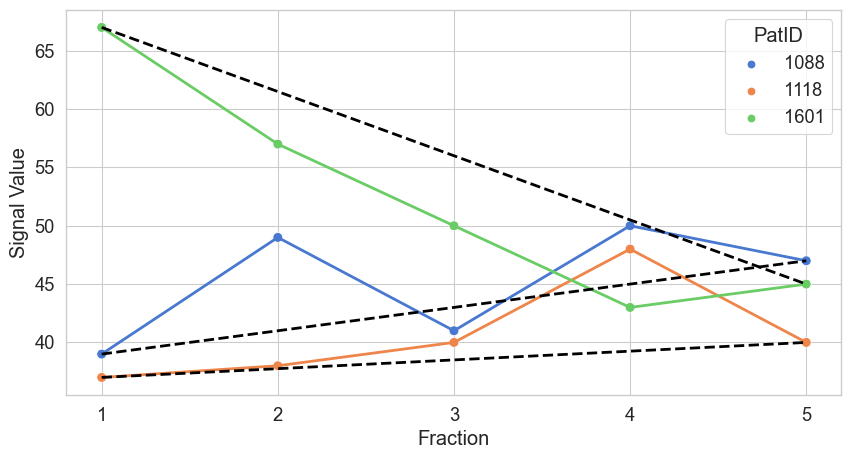

In [260]:
rand_pats = np.random.choice(patIDs, 3, replace=False)
df_sigplot = df_signal.loc[df_signal['PatID'].isin(rand_pats)]

fig, ax = plt.subplots(figsize=(10, 5))
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
sns.lineplot(x='Fraction', y='FeatureValue', hue='PatID', data=df_sigplot, ax=ax, legend=False, palette='muted', linewidth=2)
sns.scatterplot(x='Fraction', y='FeatureValue', hue='PatID', data=df_sigplot, ax=ax, legend=True, palette='muted', s=50)
for pat in rand_pats:
    df_pat = df_sigplot.loc[df_sigplot['PatID'] == pat]
    df_pat = df_pat.loc[df_pat['Fraction'].isin([1,5])]
    sns.lineplot(x='Fraction', y='FeatureValue', data=df_pat, ax=ax, legend=False, color='black', linewidth=2, linestyle='--')

ax.set_xlabel('Fraction')
ax.set_ylabel('Signal Value')
ax.set_xticks(np.arange(1, 5.1, 1))

In [434]:
rand_pats = np.random.choice(patIDs, 3, replace=False)

c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(1.0, 0, '1'),
 Text(2.0, 0, '2'),
 Text(3.0, 0, '3'),
 Text(4.0, 0, '4'),
 Text(5.0, 0, '5')]

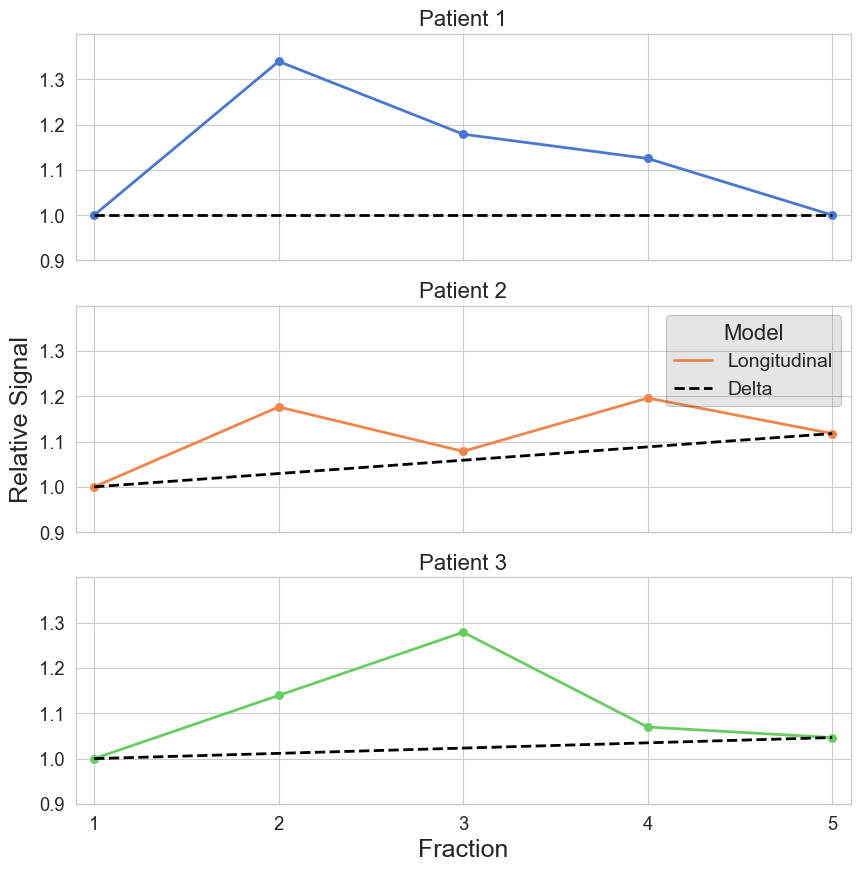

In [437]:
df_sigplot = df_signal.loc[df_signal['PatID'].isin(rand_pats)]
df_sigplot['BaseChange'] = df_sigplot['BaseChange'] + 1
# make 3x1 subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
mut_cols = sns.color_palette("muted", 3)
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
for i, axe in enumerate(axes):
    axe.set_title('Patient ' + str(i + 1), fontsize=16)
    df_pat = df_sigplot.loc[df_sigplot['PatID'] == rand_pats[i]]
    # axe.set_xlabel('Fraction')
    axe.set_xlim(0.9, 5.1)
    sns.lineplot(df_sigplot.loc[df_sigplot['PatID'] == rand_pats[i]], x='Fraction', y ='BaseChange', 
                ax=axe, legend=False, color=mut_cols[i], linewidth = 2, label='Longitudinal')
    sns.scatterplot(df_sigplot.loc[df_sigplot['PatID'] == rand_pats[i]], x='Fraction', y ='BaseChange',
                ax=axe, legend=False, color=mut_cols[i], s=50)
    sns.lineplot(df_sigplot.loc[(df_sigplot['PatID'] == rand_pats[i]) & (df_signal['Fraction'].isin([1,5]))], x='Fraction', y ='BaseChange',
                ax=axe, legend=False, color='black', linewidth = 2, linestyle='--', label='Delta')
    axe.set_ylim(df_pat['BaseChange'].min() - 0.10, df_pat['BaseChange'].max() + 0.10)
    axe.set_yticks(np.arange(df_pat['BaseChange'].min() - 0.10, df_pat['BaseChange'].max() + 0.1, 0.1))
    # axe.set_yticklabels(np.arange(df_pat['BaseChange'].min() - 0.1, df_pat['BaseChange'].max() + 0.1, 0.1))
    axe.set_ylabel(' ')
    axe.set_xlabel(' ')
    # axe.set_ylim(0.75, 1.4)
    y_min, y_max = np.round(df_pat['BaseChange'].min() - 0.1, 1), np.round(df_pat['BaseChange'].max() + 0.1, 1)
    axe.set_ylim(0.9, 1.4)
    axe.set_yticks(np.arange(0.9,1.4, 0.1))

axes[1].set_ylabel('Relative Signal', fontsize=18)
axes[1].legend(title='Model',loc='upper right', title_fontsize=16,  fontsize=14, fancybox=True, facecolor='grey', framealpha=0.2, edgecolor='black')
axes[2].set_xlabel('Fraction', fontsize=18)
axes[2].set_xticks(np.arange(1, 5.1, 1))
axes[2].set_xticklabels(np.arange(1, 5.1, 1).astype(int))


5.000000000000001
